In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Sikkim'

In [4]:
os.chdir("C:\\Users\\Sikkim\\Downloads")

In [5]:
dataset= pd.read_csv("50_Startup.csv")

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [7]:
dataset.shape

(50, 4)

In [9]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [10]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [11]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = dataset[['R&D Spend', 'Administration', 'Marketing Spend']]
y = dataset['Profit']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2,random_state= 42)

In [15]:
x_train.shape, y_train.shape

((40, 3), (40,))

In [16]:
x_test.shape, x_test.shape

((10, 3), (10, 3))

<Axes: ylabel='Frequency'>

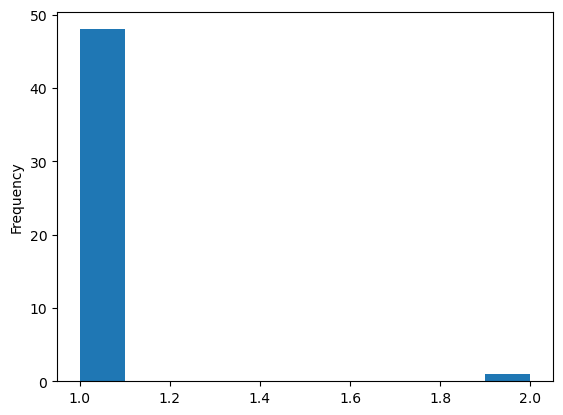

In [17]:
dataset['R&D Spend'].value_counts().plot(kind ='hist')

<Axes: ylabel='Frequency'>

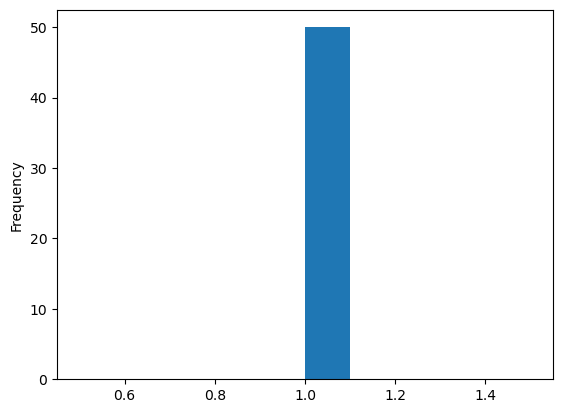

In [18]:
dataset['Administration'].value_counts().plot(kind ='hist')

<Axes: ylabel='Frequency'>

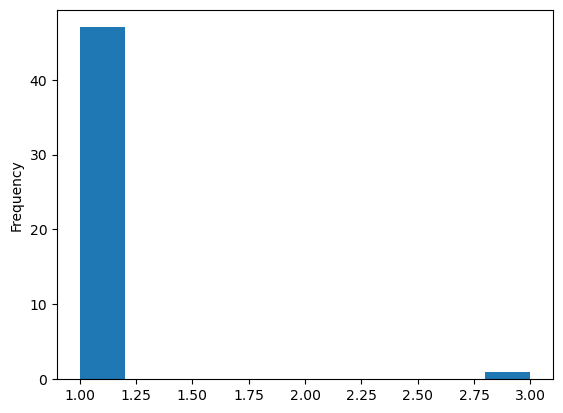

In [19]:
dataset['Marketing Spend'].value_counts().plot(kind ='hist')

<Axes: ylabel='Frequency'>

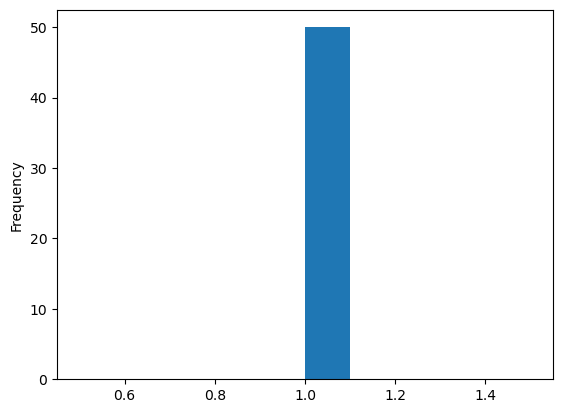

In [20]:
dataset['Profit'].value_counts().plot(kind ='hist')

In [21]:
#CORRLATION MATRIX

In [22]:
corr = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

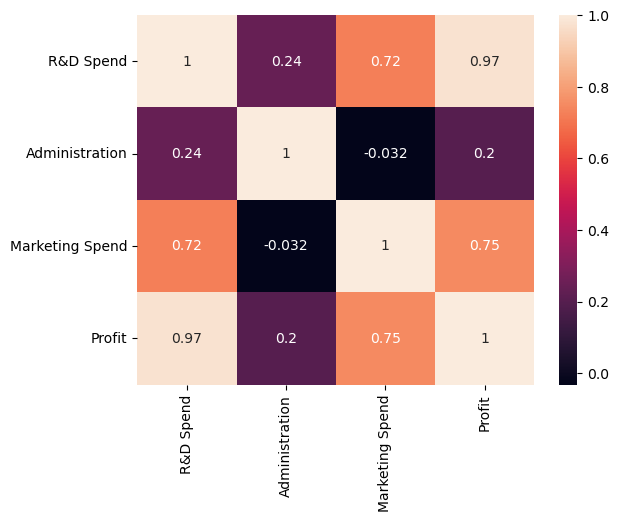

In [23]:
sns.heatmap(corr, annot= True)

In [24]:
#LINEAR REGRESSION MODELING


In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
Linear_regression_model = LinearRegression()

In [27]:
Linear_regression_model.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred_lr = Linear_regression_model.predict(x_test)
y_pred_lr

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [29]:
df = pd.DataFrame({'y_Actual' :y_test, 'y_Predicted':y_pred_lr})
df['Error']=df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])
df

,y_Actual,y_Predicted,Error,abs_error
13,134307.35,126703.027165,7604.322835,7604.322835
39,81005.76,84894.750816,-3888.990816,3888.990816
30,99937.59,98893.418160,1044.171840,1044.171840
45,64926.08,46501.708150,18424.371850,18424.371850
17,125370.37,129128.397344,-3758.027344,3758.027344
48,35673.41,50992.694863,-15319.284863,15319.284863
26,105733.54,109016.553658,-3283.013658,3283.013658
25,107404.34,100878.464145,6525.875855,6525.875855
32,97427.84,97700.596386,-272.756386,272.756386
19,122776.86,113106.152922,9670.707078,9670.707078


In [30]:


Mean_absolute_Error = df['abs_error'].mean()
Mean_absolute_Error

6979.1522523704025

In [31]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
r2_score(y_test,y_pred_lr)

0.900065308303732

In [33]:
print(f'Accuracy of the model = {round(r2_score(y_test, y_pred_lr),4)*100}%')

Accuracy of the model = 90.01%


In [34]:
round(mean_absolute_error(y_test, y_pred_lr),2)

6979.15

In [35]:
print(f'Mean Absolute error = {round(mean_absolute_error(y_test, y_pred_lr),2)}')


Mean Absolute error = 6979.15


In [36]:
mse = round(mean_squared_error(y_test, y_pred_lr),2)
mse

80926321.22

In [37]:
print(f'mean squared error ={round(mean_squared_error(y_test, y_pred_lr),2)}')

mean squared error =80926321.22


In [38]:
print('Root Mean Squared Error (RMSE) =', mse**(0.5))

Root Mean Squared Error (RMSE) = 8995.905803197364


dataset= LinearRegression()

In [204]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.scatter(x,y, color='blue', label='Data Points')

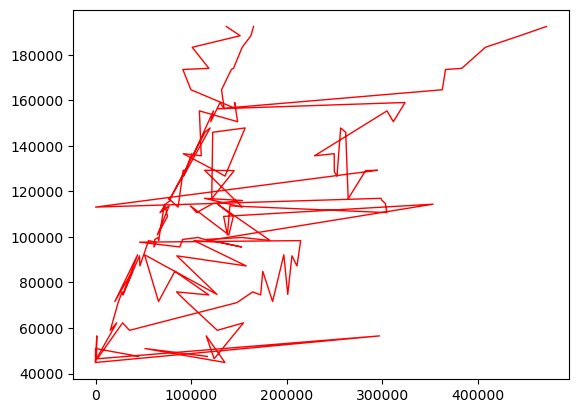

In [222]:
plt.plot(x, Linear_regression_model.predict(x),color="red", linewidth=1, label="Regression Line")

Text(0.5, 0, 'Feature')

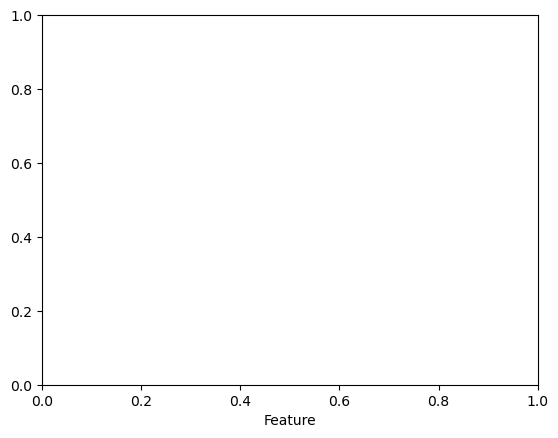

In [228]:
plt.xlabel("Feature")

Text(0.5, 1.0, 'Linear Regression')

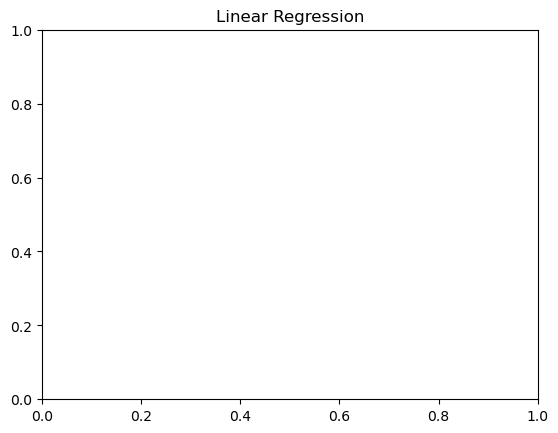

In [232]:
plt.title("Linear Regression")

In [39]:
#LASSO REGRESSION MODELING

In [40]:
from sklearn.linear_model import Lasso

In [41]:
L = Lasso ( )


In [42]:
L.fit ( x_train, y_train )


Lasso()

In [43]:
print ( 'The lasso score is : ' , L.score ( x_train, y_train ) * 100 )


The lasso score is :  95.35927757257411


In [44]:

dataset = pd.DataFrame ( )
dataset [ 'Predicted_Values' ] = L.predict ( x_train)
dataset [ 'Actual_Values' ] = y_train
dataset [ 'Error' ] = y_train- dataset [ 'Predicted_Values' ]
dataset [ 'Absolute_Error' ] = np.abs ( dataset.Error )
dataset[ 'Error_Percentage' ] = np.abs ( ( dataset [ 'Error' ] * 100 ) / y_train )
dataset= dataset.sort_values ( 'Error_Percentage' , ascending = False )
dataset


,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Percentage
23,188349.658948,108733.99,-79615.668948,79615.668948,73.220590
8,44872.436956,152211.77,107339.333044,107339.333044,70.519733
35,159035.483723,96479.51,-62555.973723,62555.973723,64.838611
37,147859.489597,89949.14,-57910.349597,57910.349597,64.381215
7,56544.230713,155752.60,99208.369287,99208.369287,63.696124
2,92166.270487,191050.39,98884.119513,98884.119513,51.758135
6,75875.613331,156122.51,80246.896669,80246.896669,51.399953
16,62267.250821,126992.93,64725.679179,64725.679179,50.967939
33,47536.539062,96778.92,49242.380938,49242.380938,50.881309
15,192416.046096,129917.04,-62499.006096,62499.006096,48.106858


In [45]:

print ( "The mean of the error is : " , np.mean ( dataset.Error ) )
print ( "\nThe mean of absolute error is : " , np.mean ( dataset.Absolute_Error ) )

The mean of the error is :  14870.662993102844

The mean of absolute error is :  38271.3270285117


In [46]:

Predicted_Test = L.predict ( x_test )
Error_Test = y_test - Predicted_Test
Error_test_Percentage = abs(Error_Test) * 100 / y_test
MSE = np.mean ( np.square ( Error_Test ) )
print ( "\nThe mean square value of error test is " , MSE )
print ( "\nThe mean square value of error train is " , np.mean ( np.square (dataset.Error) ) )


The mean square value of error test is  80926320.76116839

The mean square value of error train is  2359127164.9961567


In [47]:
RMSE = np.sqrt ( MSE )
print ( "\nThe root mean square value of error test is " , RMSE )
print ( "\nThe root mean square value of error train is " , np.sqrt ( np.mean ( np.square ( dataset.Error) ) ) )



The root mean square value of error test is  8995.905777695118

The root mean square value of error train is  48570.846863073704


In [49]:
print ( "\nAccuracy on train data is : " , 100 - MAPE )
print ( '\nAccuracy on test data is : ' , 100 - np.mean ( dataset.Error_Percentage ) )



Accuracy on train data is :  89.68366796431091

Accuracy on test data is :  70.10794287560027


In [240]:
##PLOTING THE DATA

In [252]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

ValueError: x and y must be the same size

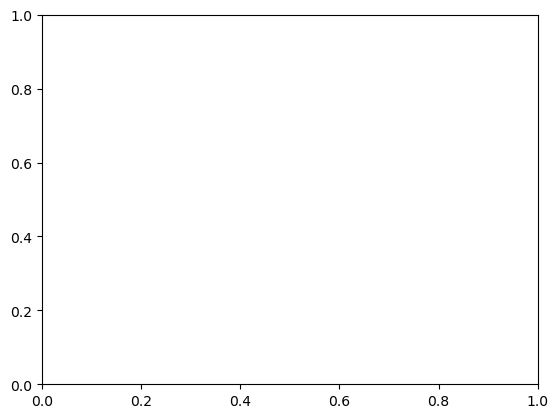

In [254]:
plt.scatter(x,y,color="blue",label="Data Points")

In [266]:
plt.plot(x, Lasso.predict(x), color="red", linewidth=2, label="Lasso Regression Line")

TypeError: LinearModel.predict() missing 1 required positional argument: 'X'

Text(0.5, 0, 'Feature')

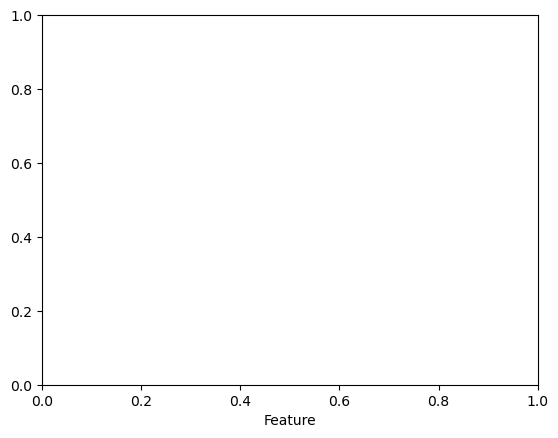

In [272]:
plt.xlabel('Feature')

Text(0, 0.5, 'Profit')

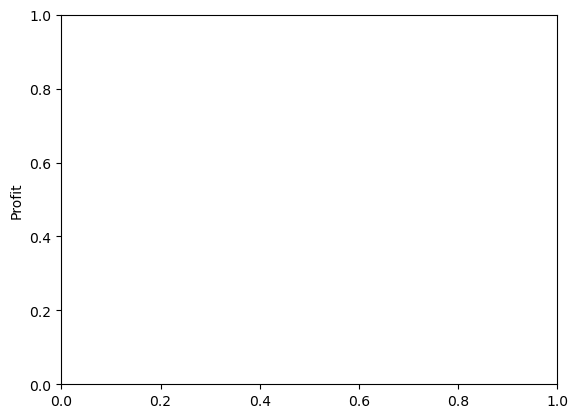

In [274]:
plt.ylabel('Profit')

Text(0.5, 1.0, 'Lasso Regression')

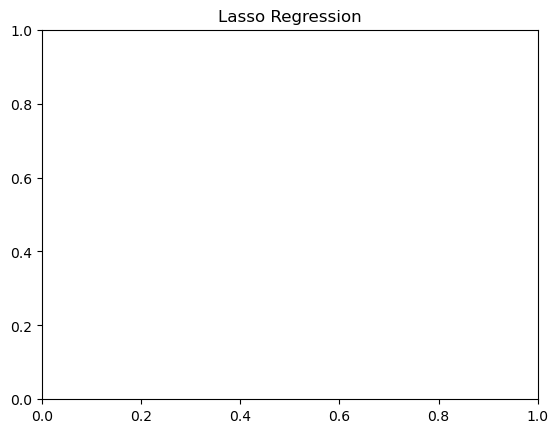

In [276]:
plt.title('Lasso Regression')

In [280]:
plt.show()

In [282]:
print("Lasso Coefficients:",Lasso.coef_)

AttributeError: type object 'Lasso' has no attribute 'coef_'

In [50]:
##DECISION TREE REGRESSION MODEALING

In [175]:

from sklearn.tree import DecisionTreeRegressor,plot_tree

In [52]:
regressor = DecisionTreeRegressor(random_state=0)

In [177]:
dt_regressor = DecisionTreeRegressor(random_state=42)

In [179]:
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [54]:
#Model Evaluation

In [55]:
y_pred =regressor.predict(x_test)

In [56]:
mse=mean_squared_error(y_test, y_pred)

In [131]:
rmse=mse**0.5

In [58]:
r2=r2_score(y_test, y_pred)

In [59]:
print(f'RMSE: {rmse}')


RMSE: 12722.071779191465


In [133]:
print(f'R-squared: {r2}')


R-squared: 0.800132508563502


In [153]:
from sklearn.tree import plot_tree

In [157]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

[Text(0.5612980769230769, 0.9444444444444444, 'R&D Spend <= 85069.312\nsquared_error = 1721457930.465\nsamples = 40\nvalue = 115651.721'),
 Text(0.2668269230769231, 0.8333333333333334, 'R&D Spend <= 28278.34\nsquared_error = 652327192.585\nsamples = 24\nvalue = 88011.8'),
 Text(0.10576923076923077, 0.7222222222222222, 'R&D Spend <= 8410.595\nsquared_error = 435347476.874\nsamples = 8\nvalue = 59027.196'),
 Text(0.057692307692307696, 0.6111111111111112, 'Marketing Spend <= 171143.764\nsquared_error = 226325685.472\nsamples = 3\nvalue = 35577.293'),
 Text(0.038461538461538464, 0.5, 'Administration <= 126205.359\nsquared_error = 194300320.897\nsamples = 2\nvalue = 28620.565'),
 Text(0.019230769230769232, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 14681.4'),
 Text(0.057692307692307696, 0.3888888888888889, 'squared_error = 0.0\nsamples = 1\nvalue = 42559.73'),
 Text(0.07692307692307693, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 49490.75'),
 Text(0.15384615384615385

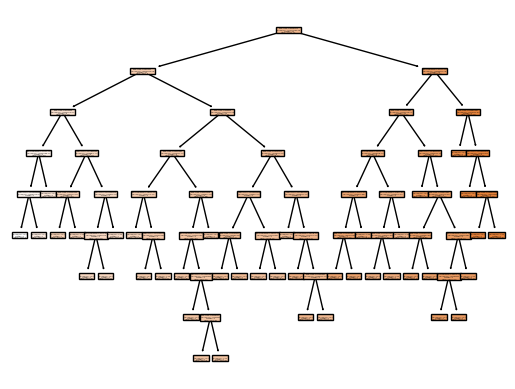

In [181]:
plot_tree(dt_regressor, feature_names=x.columns,filled=True)

Text(0.5, 1.0, 'Decision Tree Viaualization')

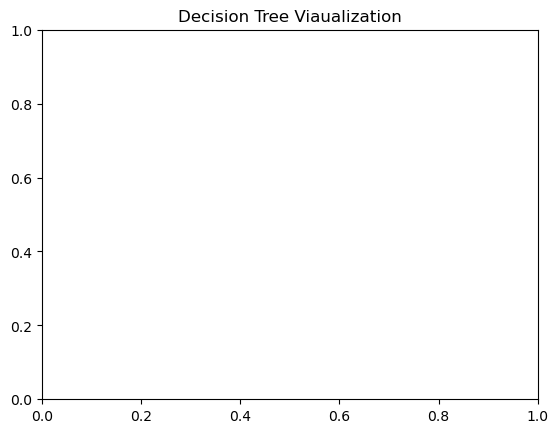

In [183]:
plt.title('Decision Tree Viaualization')

In [238]:
plt.show()